In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [32]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [34]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


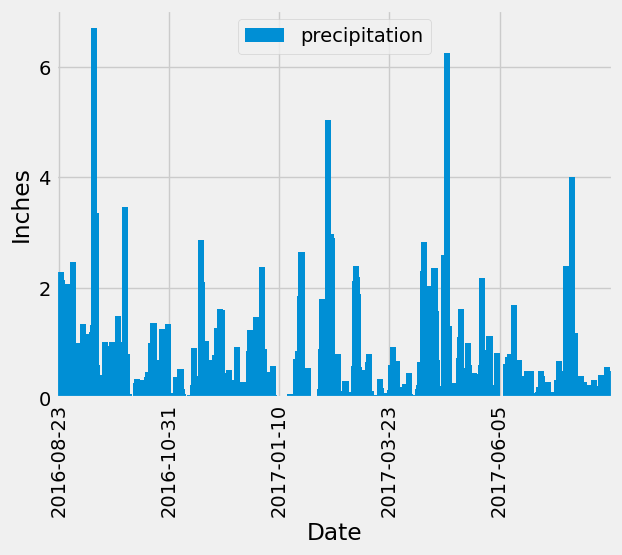

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_year_prior = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data =  session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_year_prior).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df= pd.DataFrame(precipitation_data, columns=['date','precipitation'])
precipitation_df.head()

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values("date", ascending=True)
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(kind="bar", x="date", y="precipitation", width =25, grid=True)
plt.locator_params(nbins=5)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(Station.name)).all()
print(stations_count)

[(9,)]


In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations =session.query(Measurement.station, func.count(Measurement.date)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.date).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations_data = [func.min(Measurement.tobs),
         func.max(Measurement.tobs),
         func.avg(Measurement.tobs)]

session.query(*active_stations_data).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

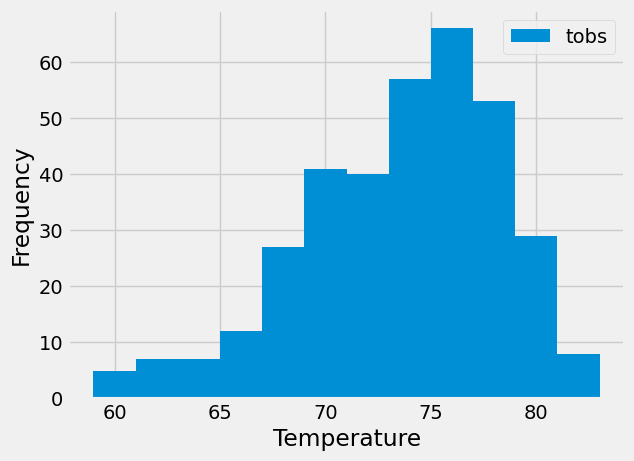

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = [Measurement.date, Measurement.tobs]

most_active_station_stats = session.query(*most_active_station).\
    filter(func.strftime(Measurement.date) >= date_year_prior).\
    filter(Measurement.station == 'USC00519281').all()

most_active_station_df = pd.DataFrame(most_active_station_stats, columns=['date', 'tobs'])

#most_active_station_df.head()

# Plot the results as a historgram
most_active_station_df.plot.hist(bins=12, xlabel='Temperature', legend=True)

# Close Session

In [44]:
# Close Session
session.close()